In [1]:
from os import environ, path
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

import sys
sys.path.append('/home/michal/PycharmProjects/doordash/doordash')
from app.features_extractors.calendar import number_of_days_until_true, number_of_days_after_true
from app.features_extractors.numerical import make_harmonic_features

DATA_PATH = environ.get('DATA_PATH', '../data/')
%matplotlib inline

In [2]:
deliveries_data = pd.read_csv(path.join(DATA_PATH, 'historical_data.csv'), parse_dates=['created_at', 'actual_delivery_time'])
deliveries_data['duration'] = (deliveries_data.actual_delivery_time - deliveries_data.created_at).dt.total_seconds()
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [3]:
deliveries_data.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,1.974210e+05
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935,2.908257e+03
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902,1.922961e+04
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,1.010000e+02
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2.104000e+03
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2.660000e+03
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3.381000e+03
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,8.516859e+06


In [4]:
deliveries_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


## Missing values

In [5]:
deliveries_data.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
duration                                            7
dtype: int64

## Categories values

### Markets

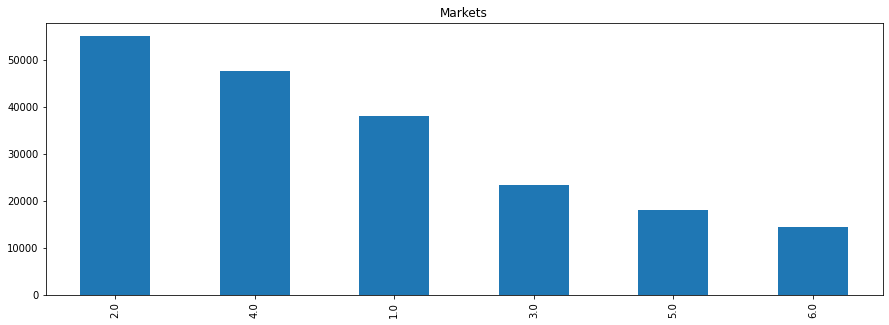

In [6]:
deliveries_data.market_id.value_counts().plot.bar(figsize=(15,5), title='Markets')

### Stores

In [7]:
print(
    deliveries_data.store_id.value_counts().shape, 
    'to many stores.',
    'If we could get stores locations and delivery location, we could use them as features.')

(6743,) to many stores. If we could get stores locations and delivery location, we could use them as features.


### Primary category

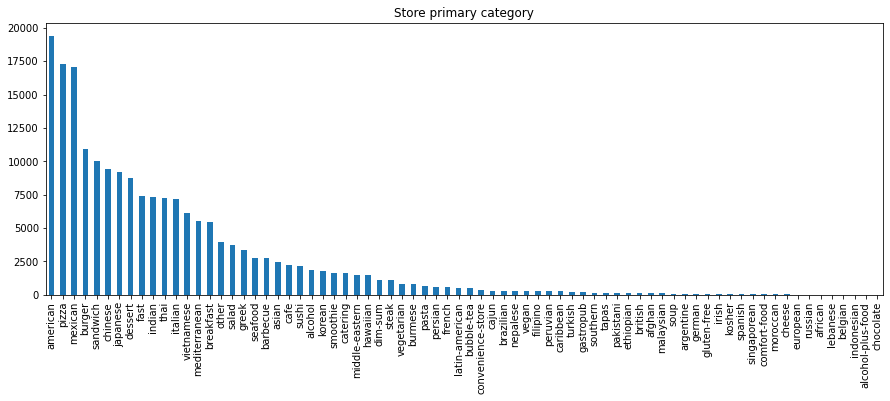

In [8]:
deliveries_data.store_primary_category.value_counts().plot.bar(figsize=(15,5), title='Store primary category')

### Order protocol

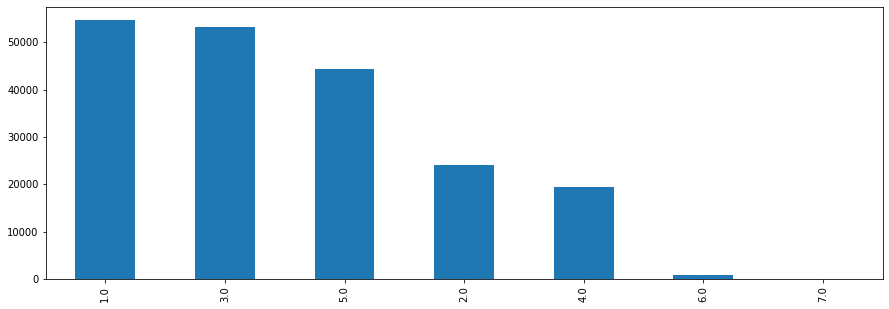

In [9]:
deliveries_data.order_protocol.value_counts().plot.bar(figsize=(15,5),)

## Distribution in time

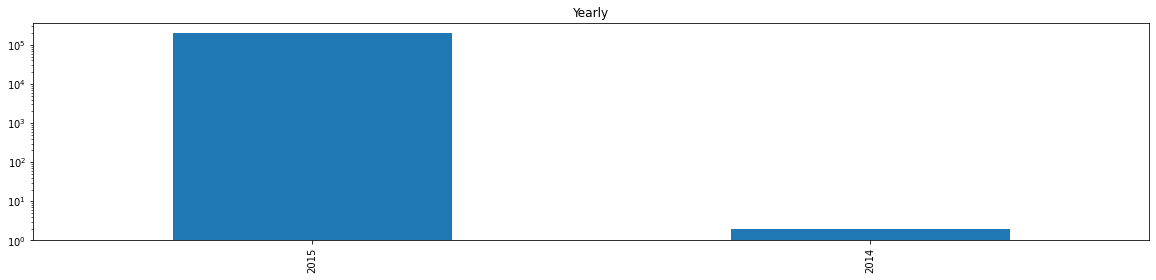

In [10]:
deliveries_data.created_at.dt.year.value_counts().plot.bar(figsize=(20, 4), title='Yearly', log=True);

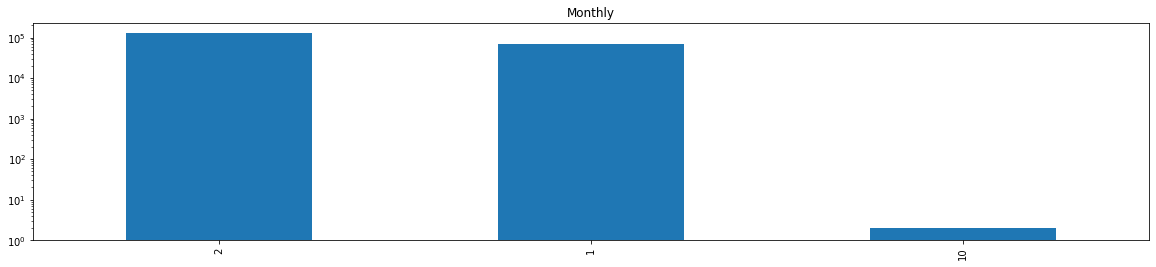

In [11]:
deliveries_data.created_at.dt.month.value_counts().plot.bar(figsize=(20, 4), title='Monthly', log=True);

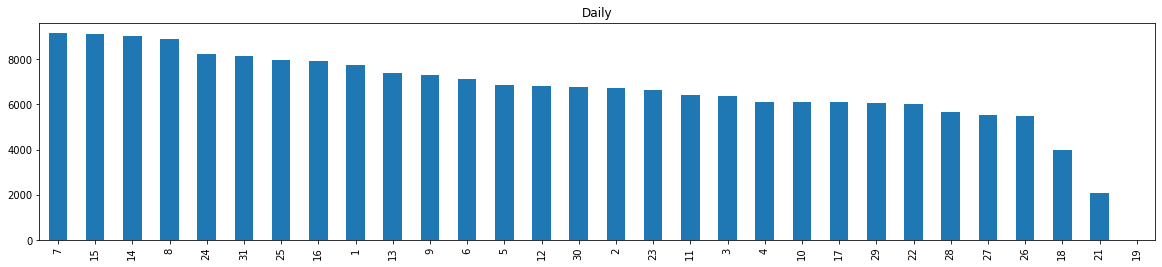

In [12]:
deliveries_data.created_at.dt.day.value_counts().plot.bar(figsize=(20, 4), title='Daily');

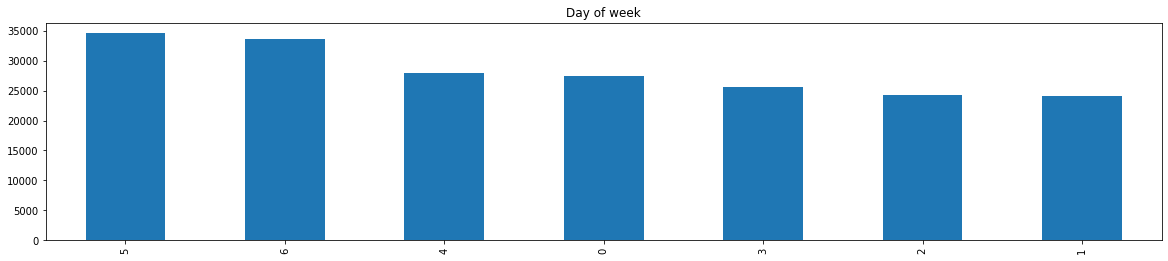

In [13]:
deliveries_data.created_at.dt.dayofweek.value_counts().plot.bar(figsize=(20, 4), title='Day of week');

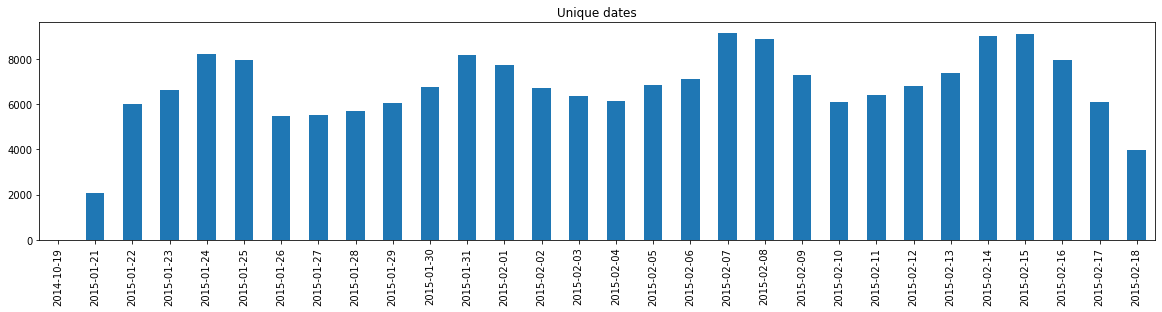

In [14]:
deliveries_data.created_at.dt.date.value_counts().sort_index().plot.bar(figsize=(20, 4), title='Unique dates');

Holidays in range (2014-10-19 - 2015-02-18):
 2014-11-11                  Veterans Day
2014-11-27                  Thanksgiving
2014-12-25                     Christmas
2015-01-01                 New Years Day
2015-01-19    Martin Luther King Jr. Day
2015-02-16                Presidents Day
dtype: object


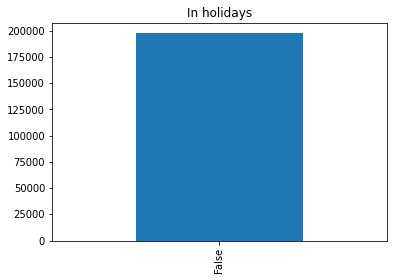

In [15]:
start = deliveries_data.created_at.dt.date.min()
end = deliveries_data.created_at.dt.date.max()
holidays = calendar().holidays(start=start, end=end, return_name=True)
print(f'Holidays in range ({start} - {end}):\n', holidays)
deliveries_data.created_at.isin(holidays.index).value_counts().plot.bar(title='In holidays')

In [16]:
dates_with_margin = pd.date_range(
        start - pd.DateOffset(months=1), 
        end + pd.DateOffset(months=4))
holidays = calendar().holidays(
    start=dates_with_margin.min(), 
    end=dates_with_margin.max())
is_holiday = pd.Series(pd.Series(dates_with_margin).isin(holidays).values, index=dates_with_margin)
unique_dates = pd.Series(deliveries_data.created_at.dt.normalize().unique()).sort_values()

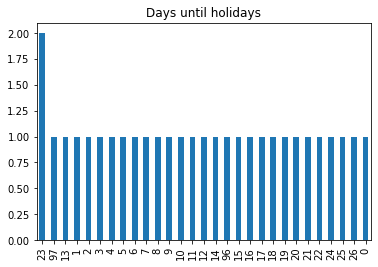

In [17]:
days_until_holidays = pd.Series(
    unique_dates.apply(lambda date: number_of_days_until_true(is_holiday, date)).values, 
    index=unique_dates)
days_until_holidays.value_counts().plot.bar(title='Days until holidays')
# one occurance for each distance, so not much benefit from current dataset

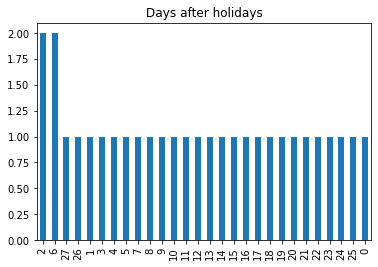

In [18]:
days_after_holidays = pd.Series(
    unique_dates.apply(lambda date: number_of_days_after_true(is_holiday, date)).values, 
    index=unique_dates)
days_after_holidays.value_counts().plot.bar(title='Days after holidays')
# one occurance for each distance, so not much benefit from current dataset

## Outliers values

### by date

In [19]:
deliveries_data[deliveries_data.created_at < '2015-01-01']

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,duration
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,3560,italian,1.0,1,1695,1,1595,1595,NaN,NaN,NaN,446,412.0,8516859.0


### by duration

In [20]:
deliveries_data[deliveries_data.duration > 60*60*12] # longer than 24h

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,duration
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,3560,italian,1.0,1,1695,1,1595,1595,NaN,NaN,NaN,446,412.0,8516859.0
27189,1.0,2015-02-16 02:24:09,2015-02-19 22:45:31,4338,indian,3.0,4,4980,4,995,1795,72.0,68.0,104.0,251,767.0,332482.0
76743,2.0,2015-02-15 04:17:35,2015-02-15 16:59:00,3247,pizza,6.0,1,990,1,795,795,114.0,112.0,184.0,446,540.0,45685.0
83055,2.0,2015-02-01 02:18:07,2015-02-01 18:08:39,355,burger,4.0,3,2379,2,389,695,109.0,102.0,163.0,251,602.0,57032.0
86952,3.0,2015-02-05 02:11:40,2015-02-05 15:34:38,1764,thai,2.0,3,2185,3,495,995,19.0,19.0,16.0,251,787.0,48178.0
185550,4.0,2015-01-28 08:34:06,2015-02-01 16:25:25,6503,dessert,5.0,3,1520,3,220,750,0.0,0.0,0.0,251,476.0,373879.0
190860,1.0,2015-02-16 02:31:05,2015-02-16 17:38:32,2169,indian,3.0,4,3660,4,375,1195,71.0,70.0,111.0,251,326.0,54447.0


In [21]:
quantiles = pd.qcut(deliveries_data.duration, 20)
deliveries_data.groupby(quantiles).duration.mean()

duration
(100.999, 1492.0]      1283.913971
(1492.0, 1699.0]       1602.626925
(1699.0, 1855.0]       1780.509729
(1855.0, 1986.0]       1922.713574
(1986.0, 2104.0]       2045.898632
(2104.0, 2217.0]       2161.536733
(2217.0, 2328.0]       2273.019094
(2328.0, 2436.0]       2382.751513
(2436.0, 2546.0]       2491.019225
(2546.0, 2660.0]       2602.936317
(2660.0, 2779.0]       2719.332356
(2779.0, 2906.0]       2841.849613
(2906.0, 3047.0]       2976.198487
(3047.0, 3200.0]       3122.031707
(3200.0, 3381.0]       3288.322826
(3381.0, 3594.0]       3484.748910
(3594.0, 3862.0]       3722.156054
(3862.0, 4235.0]       4036.513094
(4235.0, 4872.0]       4513.469646
(4872.0, 8516859.0]    6923.607197
Name: duration, dtype: float64

In [22]:
deliveries_data.duration.quantile(0.9999)
# less than 0.01% of deliveries were longer than 6 hours so we count them as outliers

23191.413999970246